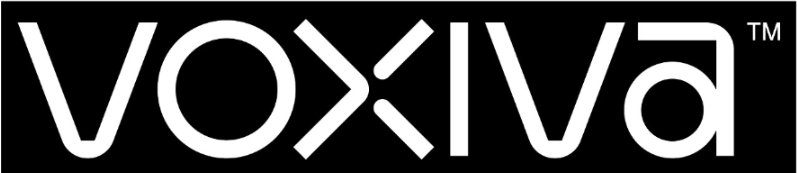

# Exploratory Data Analysis <a class="anchor" id="first-bullet"></a>

### Tabla de Contenido:
* [CLIENTES AUTOSERVICIOS](#CLIENTES-AUTOSERVICIOS)
* [DESCRIPTIVO CLIENTES](#DESCRIPTIVO-CLIENTES)
* [REVISION DE CAMPOS](#REVISION-DE-CAMPOS)
* [DESCRIPCION DE CLIENTES](#DESCRIPCION-DE-CLIENTES)
    * [DESCRIPTIVO CLIENTES](#DESCRIPTIVO-CLIENTES)
    * [DESCRIPTIVO SUCURSALES](#DESCRIPTIVO-SUCURSALES)

* [Segmentacion Geografica Lima Provincia](#Segmentacion-Geografica-Lima-Provincia)



---

In [1]:
from IPython.display import Markdown as md
import numpy as np
import pandas as pd
from cycler import cycler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import math


from itertools import cycle, islice
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

#Libreria yellowbrick
# from yellowbrick.target import BalancedBinningReference

%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# import eda_functions as eda
from tqdm import tqdm

-----------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
pd.options.display.float_format = '{:.2f}'.format

In [4]:
train = pd.read_csv('train.csv')
print(train.shape)
train.describe()

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

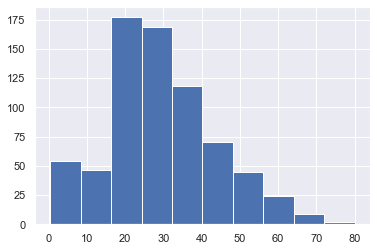

In [7]:
train.Age.hist()

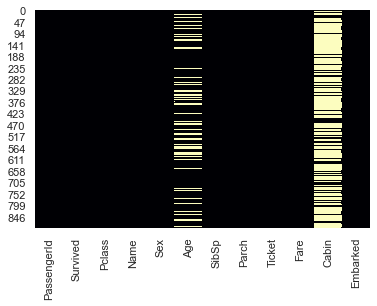

In [8]:
sns.heatmap(train.isnull(),cmap='magma',cbar = False)

### Survival Porcentage

In [9]:
sur = train['Survived'].value_counts()
survival_rate = [sur[0]/len(train)*100,sur[1]/len(train)*100]

Text(0.5, 1.0, 'SURVIVAL CHART')

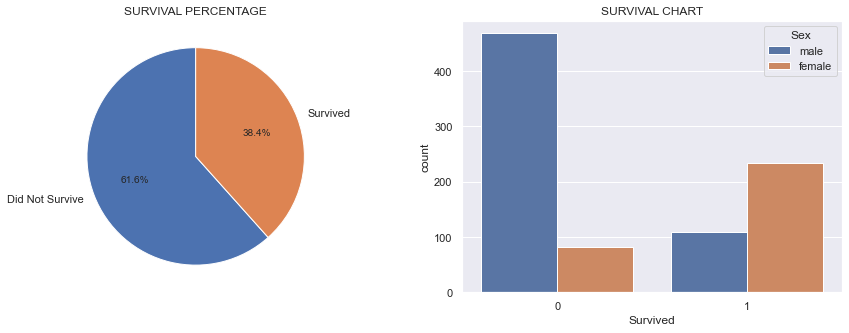

In [11]:
fig,ax = plt.subplots(nrows=1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(survival_rate,labels = ['Did Not Survive','Survived'],autopct='%1.1f%%',startangle = 90,)
plt.title('SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)
sns.countplot('Survived',data = train,hue = 'Sex')
plt.title('SURVIVAL CHART')

### GENDER WISE SURVIVAL PERCENTAGE

In [12]:
survived_male = len(train[(train['Sex'] == 'male') & (train['Survived'] == 1)])/len(train[train['Sex'] == 'male'])*100
survived_female = len(train[(train['Sex'] == 'female') & (train['Survived'] == 1)])/len(train[train['Sex'] == 'female'])*100
male = [survived_male,100-survived_male]
female = [survived_female,100-survived_female]

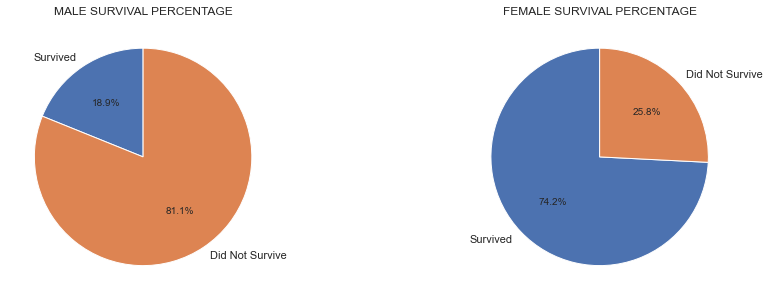

In [13]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(male,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('MALE SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)
plt.pie(female,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('FEMALE SURVIVAL PERCENTAGE')
plt.show()

### PASSENGER CLASS SURVIVAL PERCENTAGE

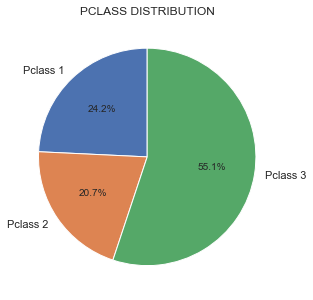

In [14]:
plt.subplots(figsize = (15,5))
Pclass = [len(train[(train['Pclass'] == 1)])/len(train)*100,
          len(train[(train['Pclass'] == 2)])/len(train)*100,
          len(train[(train['Pclass'] == 3)])/len(train)*100]
plt.pie(Pclass,labels = ['Pclass 1','Pclass 2','Pclass 3'],autopct='%1.1f%%',startangle = 90)
plt.title('PCLASS DISTRIBUTION')
plt.show()

In [15]:
survived_class_1 = len(train[(train['Pclass'] == 1) & train['Survived'] == 1])/len(train[(train['Pclass'] == 1)])*100
survived_class_2 = len(train[(train['Pclass'] == 2) & train['Survived'] == 1])/len(train[(train['Pclass'] == 2)])*100
survived_class_3 = len(train[(train['Pclass'] == 3) & train['Survived'] == 1])/len(train[(train['Pclass'] == 3)])*100
class_1 = [survived_class_1,100-survived_class_1]
class_2 = [survived_class_2,100-survived_class_2]
class_3 = [survived_class_3,100-survived_class_3]

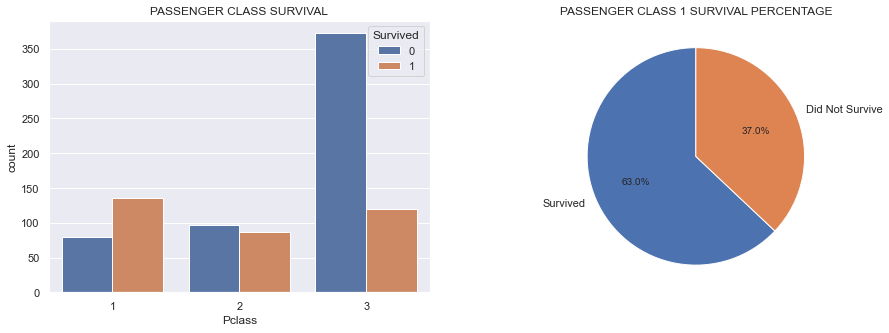

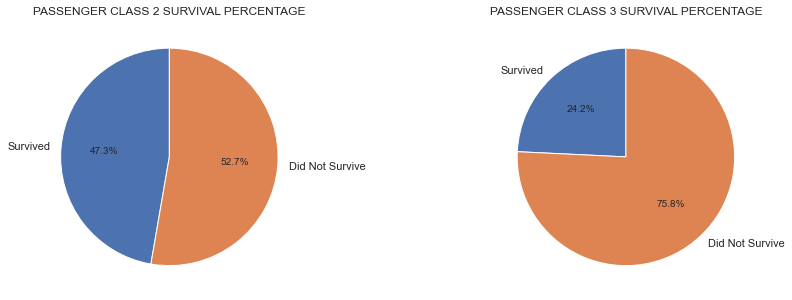

In [16]:
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot('Pclass',data = train,hue = 'Survived')
plt.title('PASSENGER CLASS SURVIVAL',)
plt.subplot(1,2,2)
plt.pie(class_1,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('PASSENGER CLASS 1 SURVIVAL PERCENTAGE')
plt.show()

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(class_2,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('PASSENGER CLASS 2 SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)
plt.pie(class_3,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('PASSENGER CLASS 3 SURVIVAL PERCENTAGE')
plt.show()

### FARE & SURVIVAL

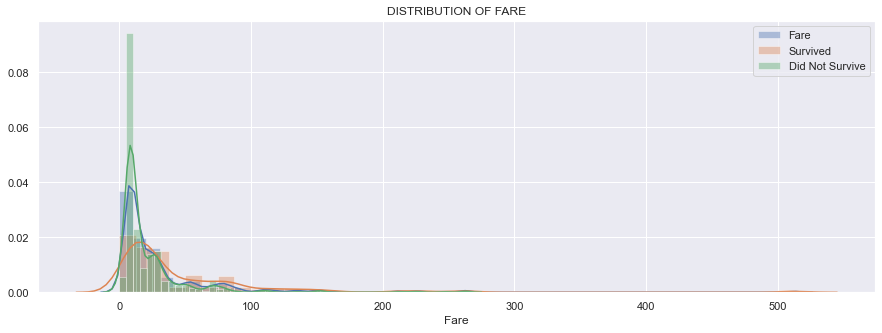

In [17]:
fig,ax = plt.subplots(figsize = (15,5))
sns.distplot(train['Fare'],label = 'Fare')
sns.distplot(train[train['Survived'] == 1]['Fare'],label = 'Survived')
sns.distplot(train[train['Survived'] == 0]['Fare'],label = 'Did Not Survive')
plt.title('DISTRIBUTION OF FARE')
plt.legend()
plt.show()

### 'SibSp' & 'Parch' PLOTS W.R.T 'SURVIVED'

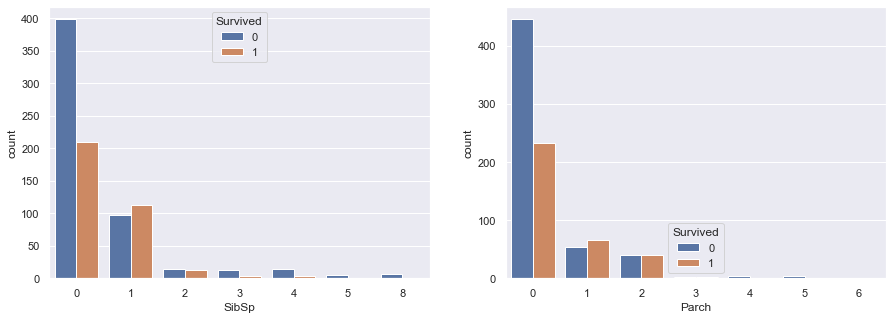

In [18]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot('SibSp',data = train,hue = 'Survived')
plt.subplot(1,2,2)
sns.countplot('Parch',data = train,hue = 'Survived')
plt.show()

In [19]:
train['Age'].mode()

0   24.00
dtype: float64

In [20]:
print('Age:')
print('Mean: {:.3}, Median: {}, Mode: 24'.format(train['Age'].mean(), train['Age'].median()))

Age:
Mean: 29.7, Median: 28.0, Mode: 24


In [21]:
train['Age_Mode'] = train['Age'].fillna(value = 24)
train['Age_Med'] = train['Age'].fillna(train['Age'].median())
train['Age_Mean'] = train['Age'].fillna(train['Age'].mean())

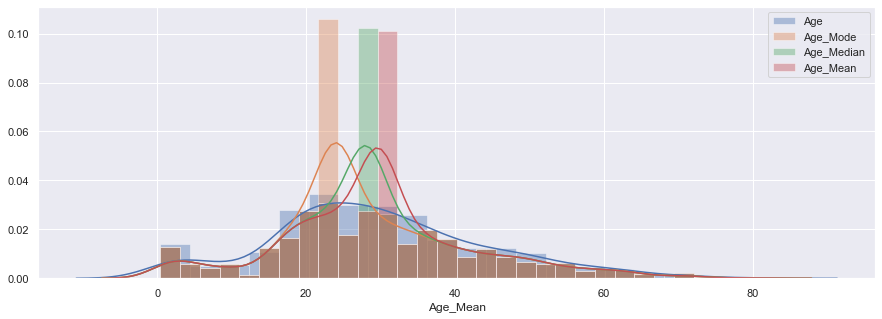

In [22]:
fig,ax = plt.subplots(figsize = (15,5))
sns.distplot(train['Age'],label = 'Age')
sns.distplot(train['Age_Mode'],label = 'Age_Mode')
sns.distplot(train['Age_Med'],label = 'Age_Median',)
sns.distplot(train['Age_Mean'],label = 'Age_Mean')
plt.legend()
plt.show()

In [23]:
# We will use median value
train['Age'] = train['Age'].fillna(train['Age'].median())
train = train.drop(columns= ['Age_Mode','Age_Med','Age_Mean'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


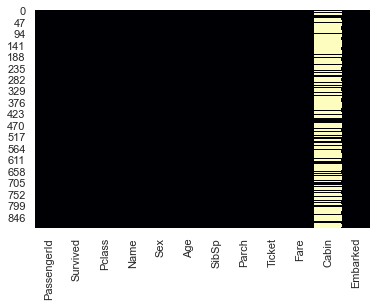

In [24]:
sns.heatmap(train.isnull(),cmap='magma',cbar = False)

In [25]:
def get_age_group(dataframe,column_name):
    
    dataframe[column_name] = dataframe[column_name].apply(np.ceil)
    age_group = {0:list(range(0,21)),1:list(range(21,41)),2:list(range(41,61)),3:list(range(61,81))}
    col = list(dataframe.columns)
    index = col.index(column_name)
    age = []
    
    for j in range(len(dataframe)):
        for k in age_group.keys():
            for i in range(len(age_group[k])):
                if (age_group[k][i] == dataframe.iloc[j,index]):
                    age.append(k)
    dataframe['Age_Group'] = age

In [26]:
get_age_group(train, 'Age')

### AGE & SURVIVAL

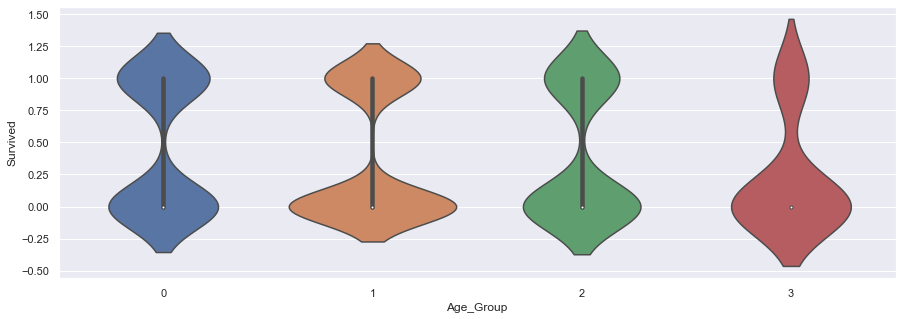

In [27]:
plt.subplots(figsize = (15,5))
sns.violinplot('Age_Group','Survived',data = train)
plt.show()

### FARE & AGE w.r.t SURVIVED

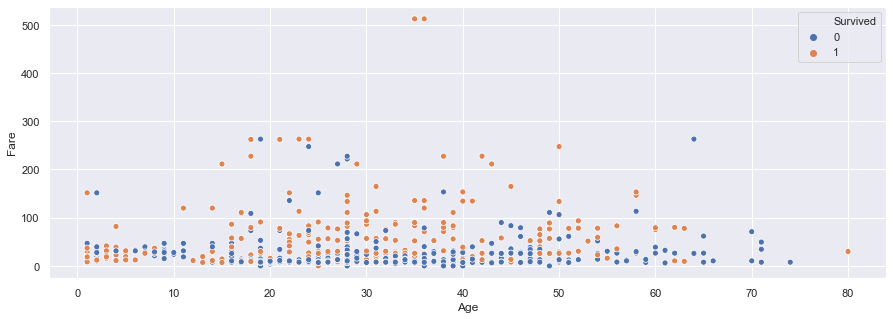

In [28]:
plt.subplots(figsize = (15,5))
sns.scatterplot('Age','Fare',data = train,hue = 'Survived')

In [29]:
def get_initials(dataframe,column_name):
    sub = []
    initials = ['Mrs.','Ms.','Mr.','Miss.','Master.','Lady.','Don.','Rev.','Dr.','Mme.','Major.','Sir.','Mlle.','Col.','Capt.','Countess.','Jonkheer.','Dona.']
    name = dataframe[column_name]
    for i in range(len(name)):
        split_names = name[i].split()
        for j in range(len(split_names)):
            if (split_names[j] in initials):
                sub.append(split_names[j])
    dataframe[column_name] = sub

In [30]:
get_initials(train,'Name')
train['Name'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Ms.            1
Lady.          1
Countess.      1
Capt.          1
Mme.           1
Sir.           1
Don.           1
Jonkheer.      1
Name: Name, dtype: int64

### INITIALS & AGE

In [31]:
le = LabelEncoder()
train['Name'] = le.fit_transform(train['Name'])
encoded_values = train['Name'].unique()
decoded_values = le.inverse_transform(encoded_values)
initials = {}
for i in range(len(encoded_values)):
    initials.setdefault(decoded_values[i],encoded_values[i])

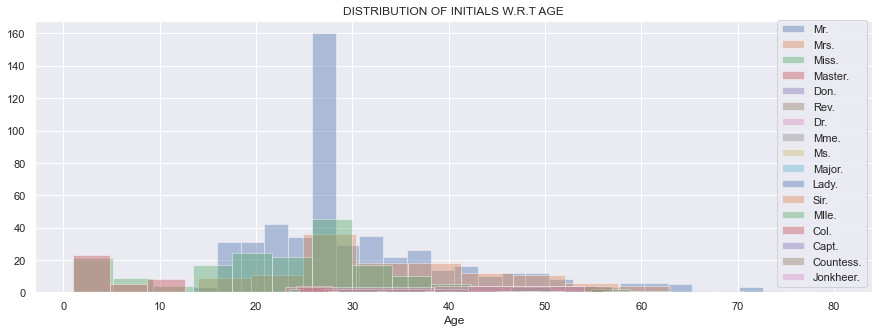

In [32]:
plt.subplots(figsize = (15,5))
for keys,values in initials.items():
    sns.distplot(train[train['Name'] == values]['Age'],label = keys,kde = False)
plt.title('DISTRIBUTION OF INITIALS W.R.T AGE')
plt.legend()
plt.show()

### INITIALS & AGE GROUP

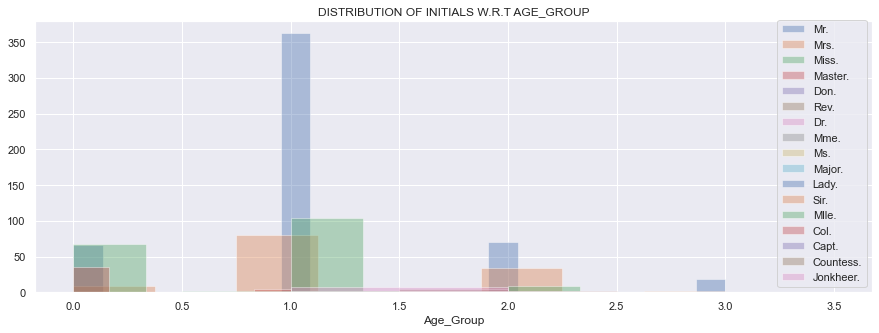

In [33]:
plt.subplots(figsize = (15,5))
for keys,values in initials.items():
    sns.distplot(train[train['Name'] == values]['Age_Group'],label = keys,kde = False)
plt.title('DISTRIBUTION OF INITIALS W.R.T AGE_GROUP')
plt.legend()
plt.show()

### SURVIVAL vs INITIALS

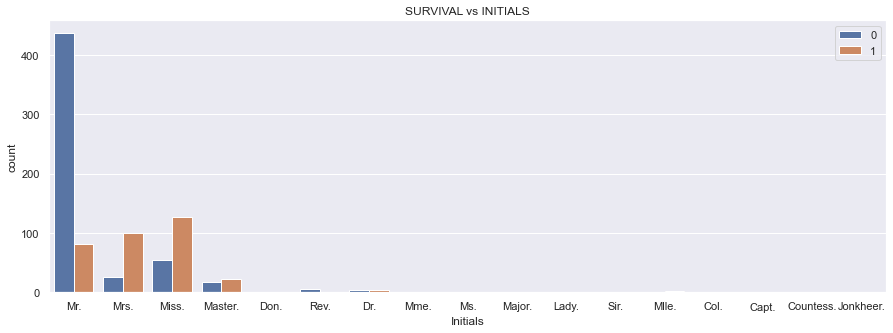

In [34]:
train['Name'] = le.inverse_transform(train['Name'])
plt.subplots(figsize = (15,5))
sns.countplot('Name',data = train,hue = 'Survived')
plt.xlabel('Initials')
plt.title('SURVIVAL vs INITIALS')
plt.legend()
plt.show()

## FEATURE SELECTION

In [35]:
train['Name'] = le.fit_transform(train['Name'])
train['Sex'] = le.fit_transform(train['Sex'])
embarked = {0:'S',1:'C',2:'Q'}
train['Embarked'] = train['Embarked'].fillna('Q')
train['Embarked'] = le.fit_transform(train['Embarked'])

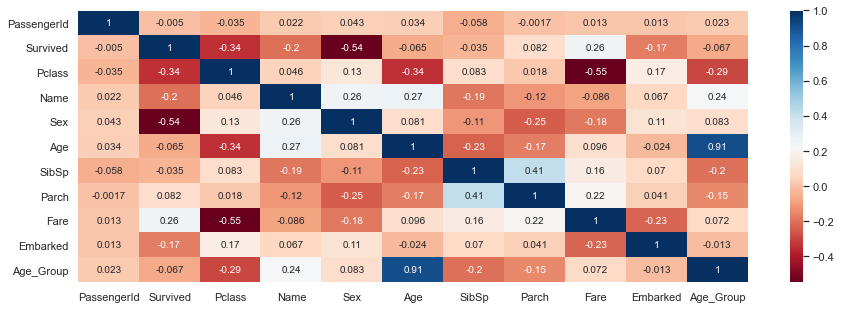

In [36]:
plt.subplots(figsize = (15,5))
sns.heatmap(train.corr(),cmap = 'RdBu',cbar = True,annot = True)

In [76]:
train = train.drop(columns = ['PassengerId','Ticket','Cabin','Age_Group'])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,12,1,22.00,1,0,7.25,2
1,1,1,13,0,38.00,1,0,71.28,0
2,1,3,9,0,26.00,0,0,7.92,2
3,1,1,13,0,35.00,1,0,53.10,2
4,0,3,12,1,35.00,0,0,8.05,2


### USING CHI-SQUARRED METHOD

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [79]:
features = train.iloc[:,1:]
target = train.iloc[:,0]

best_features = SelectKBest(score_func = chi2,k = 8)
fit = best_features.fit(features,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Column','Score'] 
print(featureScores.nlargest(8,'Score'))

     Column   Score
6      Fare 4518.32
2       Sex   92.70
0    Pclass   30.87
3       Age   21.86
1      Name   11.18
7  Embarked   10.66
5     Parch   10.10
4     SibSp    2.58


### FEATURE SELECTED

In [80]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,12,1,22.00,1,0,7.25,2
1,1,1,13,0,38.00,1,0,71.28,0
2,1,3,9,0,26.00,0,0,7.92,2
3,1,1,13,0,35.00,1,0,53.10,2
4,0,3,12,1,35.00,0,0,8.05,2


In [81]:
train = train.drop(columns = ['Embarked','SibSp','Parch'])
train.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,12,1,22.00,7.25
1,1,1,13,0,38.00,71.28
2,1,3,9,0,26.00,7.92
3,1,1,13,0,35.00,53.10
4,0,3,12,1,35.00,8.05


In [119]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
features = train[['Pclass','Sex','Name','Fare','Age']].values
features = sc.fit_transform(features)
target = train['Survived'].values

### MODELS

In [120]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 2)

In [85]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    print("ACCURACY : ",'{0:.2%}'.format(accuracy_score(y_test,prediction))) 
    print("CROSS VALIDATION SCORE : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = 10,scoring = 'accuracy').mean()))
    print("ROC_AUC SCORE : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_PLOT')
    plt.show()

In [86]:
def model_evaluation(classifier):
    
    # CONFUSION MATRIX
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    tn,fp,fn,tp = cm.flatten()
    
    # PRECISION
    print('PRECISION : ','{0:.2%}'.format(tp/(tp + fp)))
    
    # RECALL
    print('RECALL : ','{0:.2%}'.format(tp/(tp + fn)))

In [87]:
def grid_search_cv(classifier,hyperparameters):
    
    GSCV = GridSearchCV(classifier,hyperparameters,cv = 10)
    model = GSCV.fit(x_test,y_test)
    print(model)
    print('HIGHEST ACCURACY : ','{0:.2%}'.format(model.best_score_))
    print('BEST PARAMETERS : ',model.best_params_)

### Logistic Regression

ACCURACY :  76.68%
CROSS VALIDATION SCORE :  78.73%
ROC_AUC SCORE :  74.98%


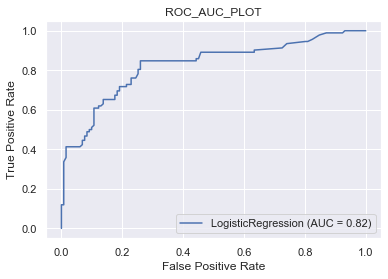

In [88]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state = 0, C=10, penalty= 'l2') 
model(classifier_lr)

In [92]:
hyperparameters = {
                    'penalty':['l1', 'l2'],
                    'C':[0,10,100,1000]
                  }

grid_search_cv(classifier_lr,hyperparameters)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=10, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
HIGHEST ACCURACY :  73.99%
BEST PARAMETERS :  {'C': 10, 'penalty': 'l2'}


PRECISION :  75.00%
RECALL :  65.22%


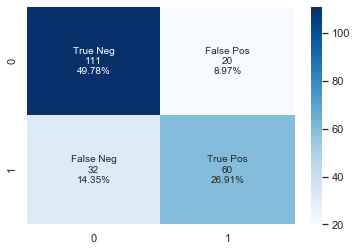

In [93]:
model_evaluation(classifier_lr)

### Suport Vector Machine

In [94]:
from sklearn.svm import SVC

classifier_svc = SVC(kernel = 'linear',C = 0.1)

hyperparameters = {'C':[0.01,0.1,1,10,100]}
grid_search_cv(classifier_svc,hyperparameters)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=0.1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)
HIGHEST ACCURACY :  77.15%
BEST PARAMETERS :  {'C': 0.1}


ACCURACY :  77.13%
CROSS VALIDATION SCORE :  79.19%
ROC_AUC SCORE :  75.03%


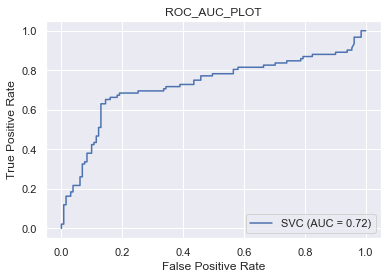

In [123]:
model(classifier_svc)

PRECISION :  77.33%
RECALL :  63.04%


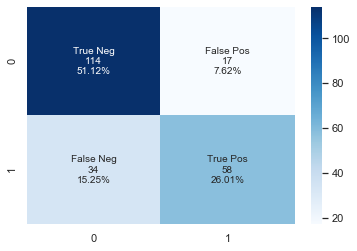

In [96]:
model_evaluation(classifier_svc)

### Decision Tree

ACCURACY :  82.51%
CROSS VALIDATION SCORE :  81.74%
ROC_AUC SCORE :  80.91%


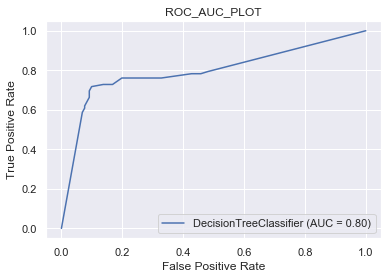

In [97]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(criterion = 'entropy')
model(classifier_dt)

PRECISION :  83.54%
RECALL :  71.74%


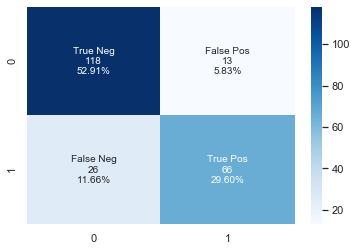

In [98]:
model_evaluation(classifier_dt)

### Ramdon Forest

ACCURACY :  78.03%
CROSS VALIDATION SCORE :  78.74%
ROC_AUC SCORE :  76.12%


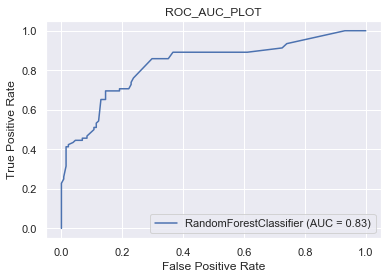

In [99]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 2,random_state = 0)
model(classifier_rf)

PRECISION :  77.92%
RECALL :  65.22%


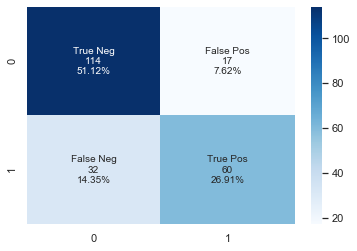

In [100]:
model_evaluation(classifier_rf)

### K-NN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(leaf_size = 7, n_neighbors = 3,p = 1)

hyperparameters= {
                    'leaf_size':list(range(1,50)),
                    'n_neighbors':list(range(1,30)),
                    'p':[1,2]
                 }

grid_search_cv(classifier_knn,hyperparameters)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=7,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=1,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fa

ACCURACY :  81.17%
CROSS VALIDATION SCORE :  81.00%
ROC_AUC SCORE :  79.92%


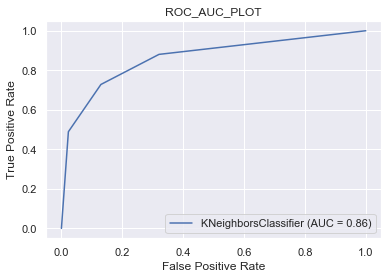

In [102]:
model(classifier_knn)

PRECISION :  79.76%
RECALL :  72.83%


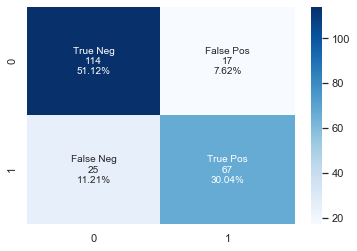

In [103]:
model_evaluation(classifier_knn)

### Model Comparison

In [107]:
models = {'MODELS':['LOGISTIC REGRESSION',
                    'SUPPORT VECTOR CLASSIFIER',
                    'DECISION TREE CLASSIFIER',
                    'RANDOM FOREST CLASSIFIER',
                    'K-NEAREST NEIGHBORS'],
         'CROSS VAL ACCURACY (%)':[78.73,79.19,81.59,78.29,81.10]}

cross_val = pd.DataFrame(models)
cross_val

,MODELS,CROSS VAL ACCURACY (%)
0,LOGISTIC REGRESSION,78.73
1,SUPPORT VECTOR CLASSIFIER,79.19
2,DECISION TREE CLASSIFIER,81.59
3,RANDOM FOREST CLASSIFIER,78.29
4,K-NEAREST NEIGHBORS,81.10


### PREDICTION ON TEST DATASET

In [108]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


### PREPROCESSING ON TEST DATASET

In [109]:
passenger_id = test['PassengerId']
test = test.drop(columns = ['PassengerId','Age','SibSp','Parch','Ticket','Cabin','Embarked'])
test.head()

,Pclass,Name,Sex,Fare
0,3,"Kelly, Mr. James",male,7.83
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,7.00
2,2,"Myles, Mr. Thomas Francis",male,9.69
3,3,"Wirz, Mr. Albert",male,8.66
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,12.29


In [110]:
test.isnull().sum()

Pclass    0
Name      0
Sex       0
Fare      1
dtype: int64

In [114]:
mode = test['Fare'].mode().tolist()[0]

In [115]:
test['Fare'] = test['Fare'].fillna(mode)

In [116]:
get_initials(test,'Name')
test['Name'] = le.fit_transform(test['Name'])
test['Sex'] = le.fit_transform(test['Sex'])
test.head()

,Pclass,Name,Sex,Fare
0,3,5,1,7.83
1,3,6,0,7.00
2,2,5,1,9.69
3,3,5,1,8.66
4,3,6,0,12.29


In [117]:
test = sc.fit_transform(test)

In [118]:
prediction = classifier_knn.predict(test)
submission = pd.DataFrame({'PassengerId':passenger_id,'Survived':prediction})
submission.to_csv('TITANIC_SUBMISSION.csv',index = False)
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
